In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [28]:
dataset_path = '../datasets/Animal/'

In [29]:
dataset_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.2,
)

In [30]:
train_dataset = dataset_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training',
)

test_dataset = dataset_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation',
)

Found 20995 images belonging to 10 classes.
Found 5244 images belonging to 10 classes.


In [31]:
# model

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
)

for layer in base_model.layers:
    layer.trainable=False

In [33]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)


In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(
    train_dataset,
    steps_per_epoch=(len(train_dataset)),
    epochs=5,
    validation_data=(test_dataset),
    validation_steps=(len(test_dataset)),
)

Epoch 1/5
657/657 [==============================] - 233s 350ms/step - loss: 0.3252 - accuracy: 0.8961 - val_loss: 0.2793 - val_accuracy: 0.9050
Epoch 2/5
657/657 [==============================] - 195s 297ms/step - loss: 0.2784 - accuracy: 0.9086 - val_loss: 0.2378 - val_accuracy: 0.9199
Epoch 3/5
657/657 [==============================] - 187s 285ms/step - loss: 0.2624 - accuracy: 0.9145 - val_loss: 0.2815 - val_accuracy: 0.9094
Epoch 4/5
657/657 [==============================] - 180s 274ms/step - loss: 0.2453 - accuracy: 0.9184 - val_loss: 0.2455 - val_accuracy: 0.9188
Epoch 5/5
657/657 [==============================] - 182s 277ms/step - loss: 0.2309 - accuracy: 0.9227 - val_loss: 0.2456 - val_accuracy: 0.9170


In [40]:
model.evaluate(test_dataset)

164/164 [==============================] - 35s 211ms/step - loss: 0.2445 - accuracy: 0.9201


[0.24454373121261597, 0.920099139213562]

In [64]:
def load_img_processor(image_path):
    image = load_img(image_path, target_size=(224,224))
    image_arr = img_to_array(image)
    image_arr = image_arr / 255.0
    image_arr = image_arr.reshape(1, 224, 224, 3)
    return image_arr

def predict_display(image_path):
    processed_image = load_img_processor(image_path)
    prediction = model.predict(processed_image)
    
    class_label = np.argmax(prediction)
    
    label = list(test_dataset.class_indices.keys())

    plt.title(f'predicted : {label[class_label]}')
    plt.imshow(load_img(image_path, target_size=(224,224)))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 58ms/step


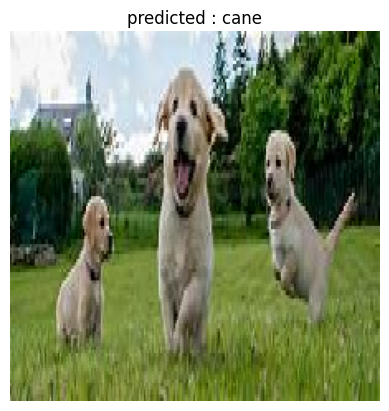

In [77]:
image = '../datasets/Animal/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg'
# image = '../datasets/Animal/cavallo/OIP--_miqJwiTIao0aZytuqccgHaFj.jpeg'
# image = '../datasets/Animal/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg'
# image = '../datasets/Animal/farfalla/OIP--04ndbWy7I04gsPgu9qOeQHaHs.jpeg'
# image = '../datasets/Animal/gallina/1000.jpeg'
# image = '../datasets/Animal/gatto/100.jpeg'
# image = '../datasets/Animal/mucca/OIP--8_E2EnxrYh7eym5nYRTJQHaE7.jpeg'
# image = '../datasets/Animal/pecora/OIP--7uwd4vM_LY8t9PB70SYvQHaEV.jpeg'
# image = '../datasets/Animal/ragno/OIP--86L_FFTa-JtV4834BxTYgHaFj.jpeg'
# image = '../datasets/Animal/scoiattolo/OIP--AAQXm1r1q9pQFMH6vjkhwHaFk.jpeg'
predict_display(image)

In [58]:
print(test_dataset.class_indices)

{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


In [59]:
print(test_dataset.class_indices.keys())

dict_keys(['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'])
